## Analisis exploratorio de los datos de partida
El objetivo de este notebook es la realización de un analisis exploratorio de los datos a tratar, siendo este el primer paso de cualquier proyecto de analisis y modelado de datos.

### Análisis sobre los textos
En primero lugar, realizamos un pequeño estudio estadístico de los textos sobre los que trabajaremos. El siguiente bloque de código construye dos funciones, una para describir estadísticamente los textos con los que contamos, `escribe_collection`, y una función auxiliar que cuenta el número de palabras de un documento, `count_words`. Además, antes de las funciones importamos todas las librerías necesarias para toda la práctica.

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")  # estilo de fondo y cuadrícula
sns.set_palette("viridis")  # paleta de colores


# Función para contar palabras

def count_words(file_path):
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        text = file.read()
    words = text.split()
    return len(words)

    

# Función para describir la colección

def describe_collection(root_path="../data/raw"):
    stats_by_group = {}

    for group_name in os.listdir(root_path):
        group_path = os.path.join(root_path, group_name)
        
        if os.path.isdir(group_path):
            file_lengths = []
            for filename in os.listdir(group_path):
                file_path = os.path.join(group_path, filename)
                word_count = count_words(file_path)
                file_lengths.append(word_count)
            
            num_documents = len(file_lengths)
            mean_words = np.mean(file_lengths)
            std_words = np.std(file_lengths)

            stats_by_group[group_name] = {
                'num_documents': num_documents,
                'mean_words': mean_words,
                'std_words': std_words
            }

    # Mostrar resultados
    for group, stats in stats_by_group.items():
        print(f"Grupo: {group}")
        print(f"Número de documentos: {stats['num_documents']}")
        print(f"Número medio de palabras: {stats['mean_words']:.2f}")
        print(f"Desviación estándar de palabras: {stats['std_words']:.2f}")
        print("-" * 50)
    
    return stats_by_group


# Función para graficar estadísticas

import matplotlib.pyplot as plt
import seaborn as sns

def prepare_boxplot_data(root_path):
    """
    Prepara un DataFrame para boxplot con columnas: 'Grupo', 'Palabras'
    """
    data = []
    for group_name in os.listdir(root_path):
        group_path = os.path.join(root_path, group_name)
        if os.path.isdir(group_path):
            for filename in os.listdir(group_path):
                file_path = os.path.join(group_path, filename)
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                    text = f.read()
                num_words = len(text.split())
                data.append({'Grupo': group_name, 'Palabras': num_words})
    return pd.DataFrame(data)


def plot_boxplot(df):
    """
    Genera un boxplot horizontal mostrando la distribución de 'Palabras' por 'Grupo'.

    Args:
        df (pd.DataFrame): DataFrame con las columnas 'Grupo' y 'Palabras'.
    """
    sns.set_style("whitegrid")
    # Aumentamos el ancho (12) y reducimos la altura (7) para una mejor visualización horizontal
    plt.figure(figsize=(12, 7))

    # Boxplot horizontal: 'Grupo' en y, 'Palabras' en x
    ax = sns.boxplot(y='Grupo', x='Palabras', data=df, palette='viridis')

    # Limitar eje X (el de la variable 'Palabras') al percentil 99
    x_max = np.percentile(df['Palabras'], 99)
    ax.set_xlim(0, x_max)

    ax.set_title("Distribución de palabras por grupo (percentil 99)", fontsize=14)
    ax.set_ylabel("Grupo", fontsize=12)
    ax.set_xlabel("Número de palabras", fontsize=12)
    # Ya no es necesario rotar las etiquetas del eje X, solo si los grupos fueran muy largos en Y
    plt.tight_layout()
    plt.savefig("../docs/images/boxplot_palabras_por_grupo.png")
    plt.show()


Grupo: comp.sys.ibm.pc.hardware
Número de documentos: 124
Número medio de palabras: 247.70
Desviación estándar de palabras: 373.05
--------------------------------------------------
Grupo: comp.sys.mac.hardware
Número de documentos: 146
Número medio de palabras: 184.38
Desviación estándar de palabras: 108.42
--------------------------------------------------
Grupo: rec.autos
Número de documentos: 61
Número medio de palabras: 216.18
Desviación estándar de palabras: 170.52
--------------------------------------------------
Grupo: rec.sport.hockey
Número de documentos: 50
Número medio de palabras: 273.88
Desviación estándar de palabras: 265.68
--------------------------------------------------
Grupo: sci.electronics
Número de documentos: 211
Número medio de palabras: 265.78
Desviación estándar de palabras: 807.43
--------------------------------------------------
Grupo: talk.politics.guns
Número de documentos: 141
Número medio de palabras: 414.33
Desviación estándar de palabras: 473.05
--

C:\Users\sabel\AppData\Local\Temp\ipykernel_7028\2303040985.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y='Grupo', x='Palabras', data=df, palette='viridis')


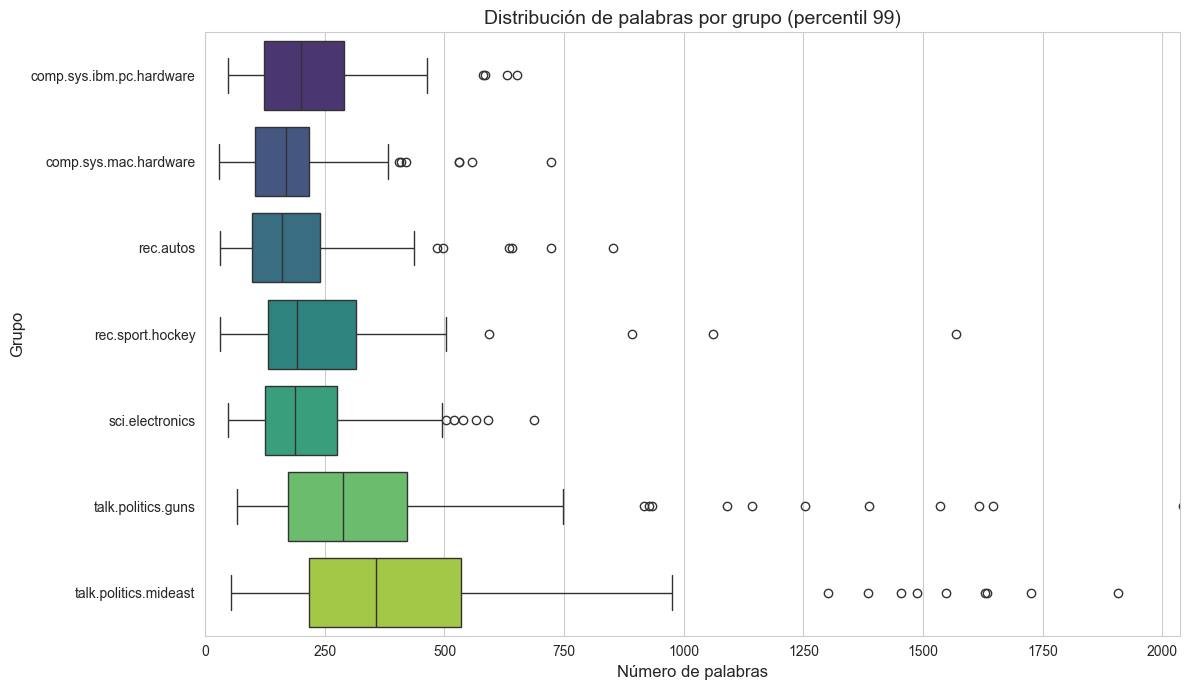

In [6]:
stats = describe_collection("../data/raw")
df = prepare_boxplot_data("../data/raw")

plot_boxplot(df)

C:\Users\sabel\AppData\Local\Temp\ipykernel_15996\1759123991.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y='Grupo', x='Palabras', data=df, palette='viridis')


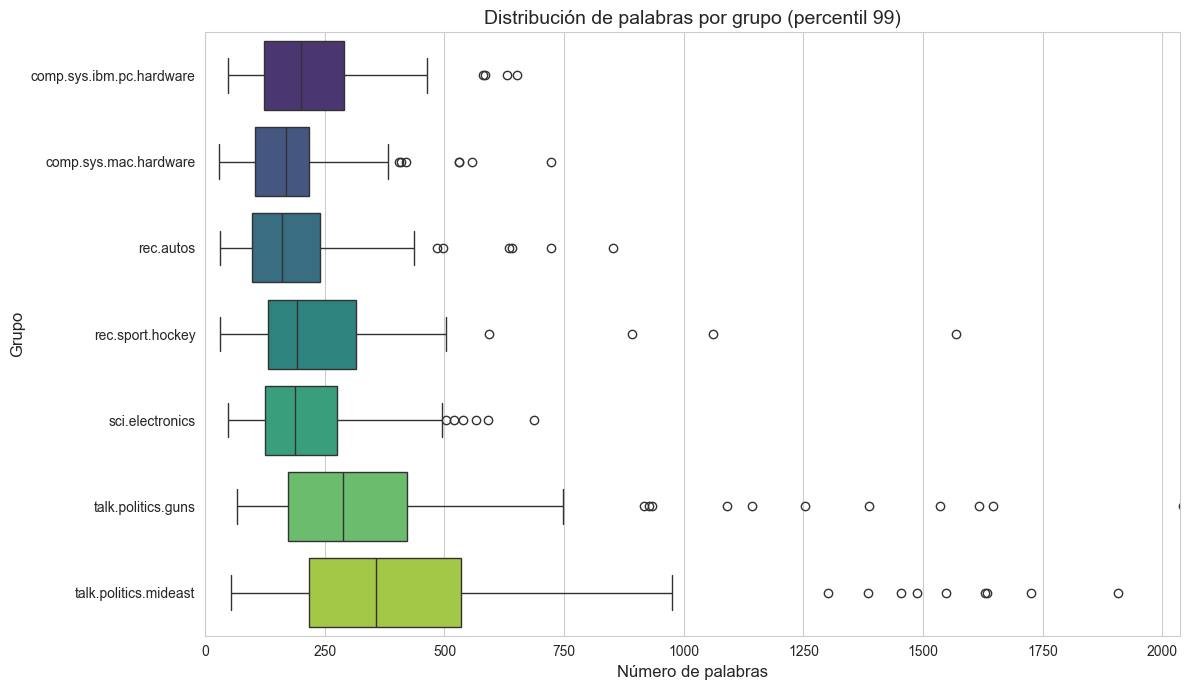

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np




# -----------------------------
# Uso
# -----------------------------
if __name__ == "__main__":

    plot_boxplot(df)
